# **Tutorial - App IMC**
---

## Pré-requisitos da aula

- Funções
- Import
- Orientação a Objetos
- Interface Gráfica
- Introdução ao Flet
- Meu primeiro Flet App
- Eventos
- Light e Dark Mode
- Tutorial - App Combustível

---

Conhece o **IMC**? Não? É a sigla para **Índice de Massa Corporal**. Esse cálculo é utilizado para verificar se uma pessoa está dentro do peso ideal. Pois adivinha? Nosso próximo App será para fazer esse cálculo para você. Portanto, mãos à obra.

## Situação-problema
---

Nosso cliente da vez deseja acompanhar seu peso ideal, seja pelo celular, pelo seu computador, ou por um site da Internet. Como o Flet rompe a barreira das plataformas, vamos criar nosso app para todas elas, para que o usuário possa ter esse acompanhamento onde ele estiver.

## Solução
---

### Começando a criar o app

Nosso cliente quer nosso app praticamente onipresente. Portanto, temos que ter certeza de que nosso app rodará em tudo quanto é lugar: qualquer SO de qualquer computador ou celular e em qualquer navegador.

1. Começe criando o projeto. Faça o nosso ritual padrão de criar a pasta do projeto (nome usado nesse tutorial: "**imc**"). Não se esqueça de criar o ambiente virtual `.venv`, instalar o Flet (`pip install flet`) e criar um novo projeto flet dentro da pasta (`flet create .`).
2. Nosso app também terá um **AppBar** com direito a um botão para alternar os temas claro e escuro. Como fizemos isso no app anterior, vamos repetir o tutorial do **App Combustível** até o **passo 13**. Segue o código-fonte até esse ponto.

In [ ]:
import flet as ft

def main(page: ft.Page):
    def mudar_tema(e):
        page.theme_mode = (
            ft.ThemeMode.DARK
            if page.theme_mode == ft.ThemeMode.LIGHT
            else ft.ThemeMode.LIGHT
        )
        page.bgcolor = (
            ft.colors.WHITE
            if page.theme_mode == ft.ThemeMode.LIGHT
            else ft.colors.GREY_900
        )
        tema.name = (
            ft.icons.SUNNY
            if page.theme_mode == ft.ThemeMode.LIGHT
            else ft.icons.MODE_NIGHT
        )
        page.update()

    page.title = "IMC"
    page.scroll = "adaptive"
    page.theme_mode = ft.ThemeMode.LIGHT
    page.bgcolor = ft.colors.WHITE

    tema = ft.Icon(name=ft.icons.SUNNY)
    interruptor = ft.Switch(on_change=mudar_tema)

    page.appbar = ft.AppBar(title=ft.Text("IMC", size=16), actions=[tema, interruptor])

    page.add(
        ft.SafeArea(
            ft.Row(
                [ft.Text("\nÍndice de Massa Corporal", size=25, weight="bold")],
                alignment=ft.MainAxisAlignment.CENTER
            )
        )
    )

ft.app(main)

3. O resultado, por hora, no app desktop é esse logo abaixo:

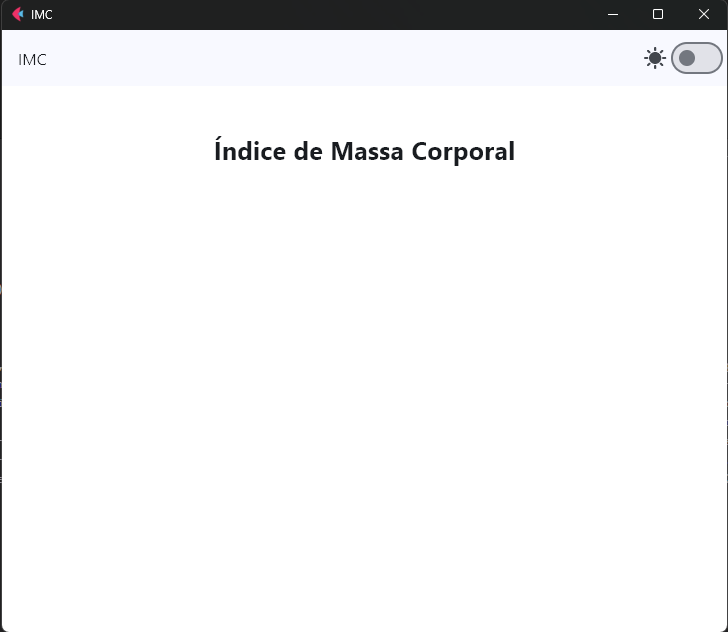

4. Teste nas outras plataformas também, e aproveite para mudar também o tema.

### Adicionando controles de página e manipulando eventos

5. Esse app é bem parecido com o anterior: dois controles do tipo `ft.TextField()` e um botão que ativa uma função que irá calcular o IMC e exibir na tela. Portanto, não vamos perder tempo e criar as variáveis `peso` e `altura`, e adicioná-las na página:

In [ ]:
import flet as ft

def main(page: ft.Page):
    def mudar_tema(e):
        page.theme_mode = (
            ft.ThemeMode.DARK
            if page.theme_mode == ft.ThemeMode.LIGHT
            else ft.ThemeMode.LIGHT
        )
        page.bgcolor = (
            ft.colors.WHITE
            if page.theme_mode == ft.ThemeMode.LIGHT
            else ft.colors.GREY_900
        )
        tema.name = (
            ft.icons.SUNNY
            if page.theme_mode == ft.ThemeMode.LIGHT
            else ft.icons.MODE_NIGHT
        )
        page.update()

    page.title = "IMC"
    page.scroll = "adaptive"
    page.theme_mode = ft.ThemeMode.LIGHT
    page.bgcolor = ft.colors.WHITE

    tema = ft.Icon(name=ft.icons.SUNNY)
    interruptor = ft.Switch(on_change=mudar_tema)

    # variáveis do imc
    peso = ft.TextField(
        label="Peso",
        suffix_text="kg",
        keyboard_type=ft.KeyboardType.NUMBER
    )
    altura = ft.TextField(
        label="Altura",
        suffix_text="m",
        keyboard_type=ft.KeyboardType.NUMBER
    )

    page.appbar = ft.AppBar(title=ft.Text("IMC", size=16), actions=[tema, interruptor])

    page.add(
        ft.SafeArea(
            ft.Row(
                [ft.Text("\nÍndice de Massa Corporal", size=25, weight="bold")],
                alignment=ft.MainAxisAlignment.CENTER
            )
        ),
        # elementos da tela
        ft.ResponsiveRow(
            [
                ft.Container(peso, col={"sm": 6, "md": 4, "xl": 2}),
                ft.Container(altura, col={"sm": 6, "md": 4, "xl": 2})
            ],
            alignment=ft.MainAxisAlignment.CENTER
        )
    )

ft.app(main)

6. Por hora, o resultado será parecido com esse:

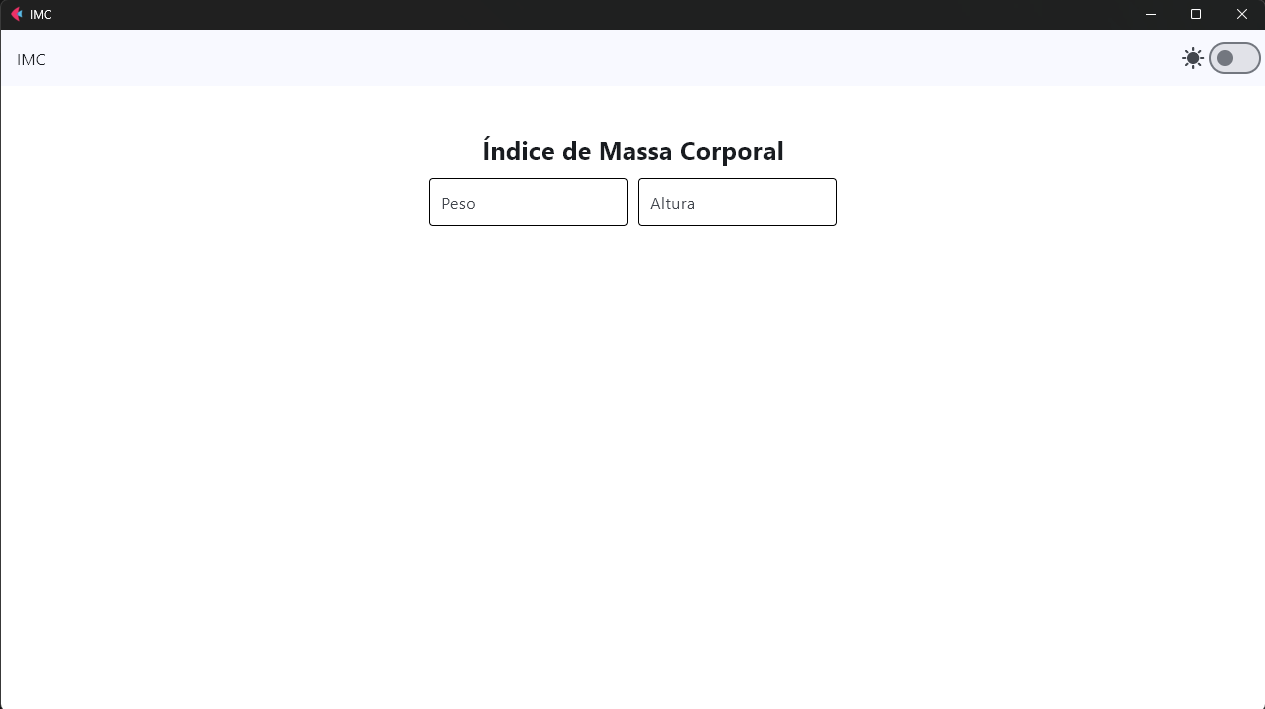

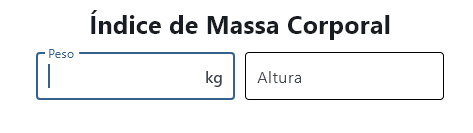

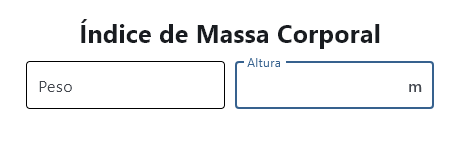

7. Mais uma vez, esses resultados são para a versão desktop em modo claro. Vá testando em outras plataformas para ver como seu aplicativo está ficando.
8. O nosso próximo passo é informar ao usuário o seu diagnóstico com base no valor calculado do seu IMC. Mas para isso, precisaremos da tabela do IMC. Vamos pegar a tabela abaixo como exemplo:

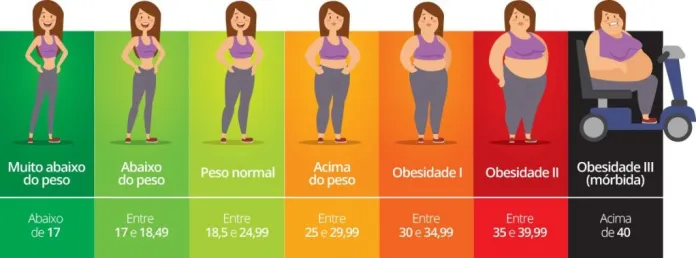

9. Assim como o nosso app anterior, queremos que o resultado apareça em uma caixa de diálogo estilo **modal**. Portanto, nosso próximo passo é criar esse modal. Desenvolva-o logo após as variáveis e antes de `page.appbar`:

In [ ]:
dlg_modal = ft.AlertDialog(
    modal=True,
    title=ft.Text(),
    content=ft.Text(size=20, weight="bold"),
    actions=[ft.TextButton("OK", on_click=lambda e: page.close(dlg_modal))],
    actions_alignment=ft.MainAxisAlignment.END
)

10. Agora que temos as informações da tabela e o modal para mostrar o resultado na tela, vamos criar a função que irá calcular o IMC e informar o diagnóstico para o usuário:

In [ ]:
def calcular_imc(e):
    if not peso.value:
        peso.error_text = "Peso não pode ficar vazio"
        page.update()
    else:
        peso.error_text = ""
        page.update()

    if not altura.value:
        altura.error_text = "Altura não pode ficar vazio"
        page.update()
    else:
        altura.error_text = ""

        peso.value = float(peso.value.replace(",", "."))
        altura.value = float(altura.value.replace(",", "."))

        imc = peso.value / (altura.value**2)

        dlg_modal.title.value = f"Seu IMC: {imc:.2f}."

        if imc < 17:
            dlg_modal.content.value = "Você está muito abaixo do peso. Procure um médico."
        elif imc < 18.5:
            dlg_modal.content.value = "Você está abaixo do peso."
        elif imc < 25:
            dlg_modal.content.value = "Você está no seu peso ideal. Parabéns!"
        elif imc < 30:
            dlg_modal.content.value = "Você está acima do seu peso ideal."
        elif imc < 35:
            dlg_modal.content.value = "Você está com Obesidade I."
        elif imc < 40:
            dlg_modal.content.value = "Você está com Obesidade II."
        else:
            dlg_modal.content.value = "Você está com Obesidade mórbida. Procure um médico."

        page.open(dlg_modal)

        peso.value = ""
        altura.value = ""

        page.update()

11. Com a função `informar_diagnostico` criada, agora podemos criar o botão dentro da `page.add()` que irá chamá-la:

In [ ]:
page.add(
    ft.SafeArea(
        ft.Row(
            [ft.Text("\nÍndice de Massa Corporal", size=25, weight="bold")],
            alignment=ft.MainAxisAlignment.CENTER
        )
    ),
    ft.ResponsiveRow(
        [
            ft.Container(peso, col={"sm": 6, "md": 4, "xl": 2}),
            ft.Container(altura, col={"sm": 6, "md": 4, "xl": 2})
        ],
        alignment=ft.MainAxisAlignment.CENTER
    ),
    # botão
    ft.Row(
        [
            ft.Container(
                ft.ElevatedButton("Verificar", on_click=calcular_imc),
                padding=30
            )
        ],
        alignment=ft.MainAxisAlignment.CENTER
    )
)

12. Aproveite e acrescente o evento `on_submit` na variável `altura`:

In [ ]:
altura = ft.TextField(
    label="Altura",
    suffix_text="m",
    keyboard_type=ft.KeyboardType.NUMBER,
    on_submit=calcular_imc
)

13. Antes de finalizarmos o app, precisamos de um **ícone**. Vamos salvar um dentro da pasta **assets**:

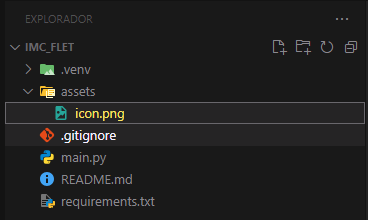


14. Agora, vamos acrescentar o ícone no **AppBar**:

In [ ]:
page.appbar = ft.AppBar(
    leading=ft.Image(src=f"/icon.png", fit=ft.ImageFit.CONTAIN),
    leading_width=48,
    title=ft.Text("IMC", size=16),
    actions=[tema, interruptor]
)

15. O algoritmo completo segue logo abaixo:

In [ ]:
import flet as ft

def main(page: ft.Page):
    def mudar_tema(e):
        page.theme_mode = (
            ft.ThemeMode.DARK
            if page.theme_mode == ft.ThemeMode.LIGHT
            else ft.ThemeMode.LIGHT
        )
        page.bgcolor = (
            ft.colors.WHITE
            if page.theme_mode == ft.ThemeMode.LIGHT
            else ft.colors.GREY_900
        )
        tema.name = (
            ft.icons.SUNNY
            if page.theme_mode == ft.ThemeMode.LIGHT
            else ft.icons.MODE_NIGHT
        )
        page.update()

    def calcular_imc(e):
        if not peso.value:
            peso.error_text = "Peso não pode ficar vazio"
            page.update()
        else:
            peso.error_text = ""
            page.update()

        if not altura.value:
            altura.error_text = "Altura não pode ficar vazio"
            page.update()
        else:
            altura.error_text = ""

            peso.value = float(peso.value.replace(",", "."))
            altura.value = float(altura.value.replace(",", "."))

            imc = peso.value / (altura.value**2)

            dlg_modal.title.value = f"Seu IMC: {imc:.2f}."

            if imc < 17:
                dlg_modal.content.value = "Você está muito abaixo do peso. Procure um médico."
            elif imc < 18.5:
                dlg_modal.content.value = "Você está abaixo do peso."
            elif imc < 25:
                dlg_modal.content.value = "Você está no seu peso ideal. Parabéns!"
            elif imc < 30:
                dlg_modal.content.value = "Você está acima do seu peso ideal."
            elif imc < 35:
                dlg_modal.content.value = "Você está com Obesidade I."
            elif imc < 40:
                dlg_modal.content.value = "Você está com Obesidade II."
            else:
                dlg_modal.content.value = "Você está com Obesidade mórbida. Procure um médico."

            page.open(dlg_modal)

            peso.value = ""
            altura.value = ""

            page.update()

    page.title = "IMC"
    page.scroll = "adaptive"
    page.theme_mode = ft.ThemeMode.LIGHT
    page.bgcolor = ft.colors.WHITE

    tema = ft.Icon(name=ft.icons.SUNNY)
    interruptor = ft.Switch(on_change=mudar_tema)

    peso = ft.TextField(
        label="Peso",
        suffix_text="kg",
        keyboard_type=ft.KeyboardType.NUMBER
    )
    altura = ft.TextField(
        label="Altura",
        suffix_text="m",
        keyboard_type=ft.KeyboardType.NUMBER,
        on_submit=calcular_imc
    )
    dlg_modal = ft.AlertDialog(
        modal=True,
        title=ft.Text(),
        content=ft.Text(size=20, weight="bold"),
        actions=[ft.TextButton("OK", on_click=lambda e: page.close(dlg_modal))],
        actions_alignment=ft.MainAxisAlignment.END
    )

    page.appbar = ft.AppBar(
        leading=ft.Image(src=f"/icon.png", fit=ft.ImageFit.CONTAIN),
        leading_width=48,
        title=ft.Text("IMC", size=16),
        actions=[tema, interruptor]
    )

    page.add(
        ft.SafeArea(
            ft.Row(
                [ft.Text("\nÍndice de Massa Corporal", size=25, weight="bold")],
                alignment=ft.MainAxisAlignment.CENTER
            )
        ),
        ft.ResponsiveRow(
            [
                ft.Container(peso, col={"sm": 6, "md": 4, "xl": 2}),
                ft.Container(altura, col={"sm": 6, "md": 4, "xl": 2})
            ],
            alignment=ft.MainAxisAlignment.CENTER
        ),
        ft.Row(
            [
                ft.Container(
                    ft.ElevatedButton("Verificar", on_click=calcular_imc),
                    padding=30
                )
            ],
            alignment=ft.MainAxisAlignment.CENTER
        )
    )

ft.app(main)

16. Resultado:

#### Desktop

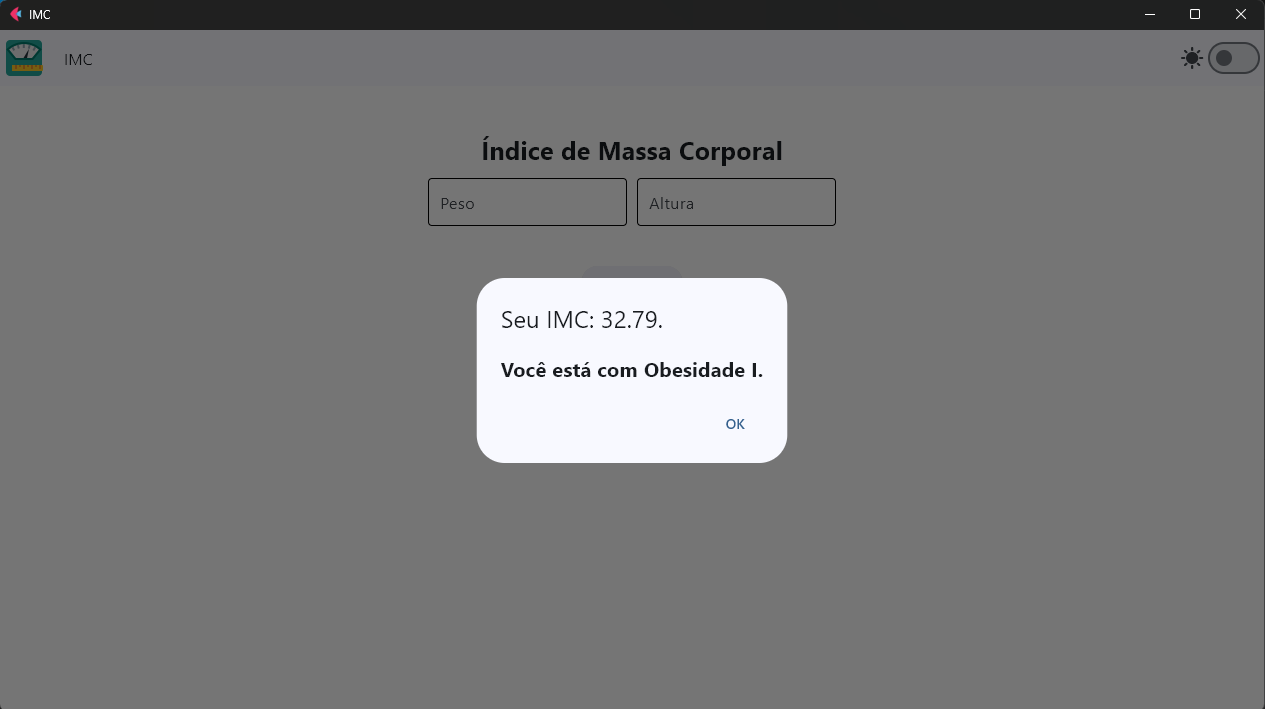
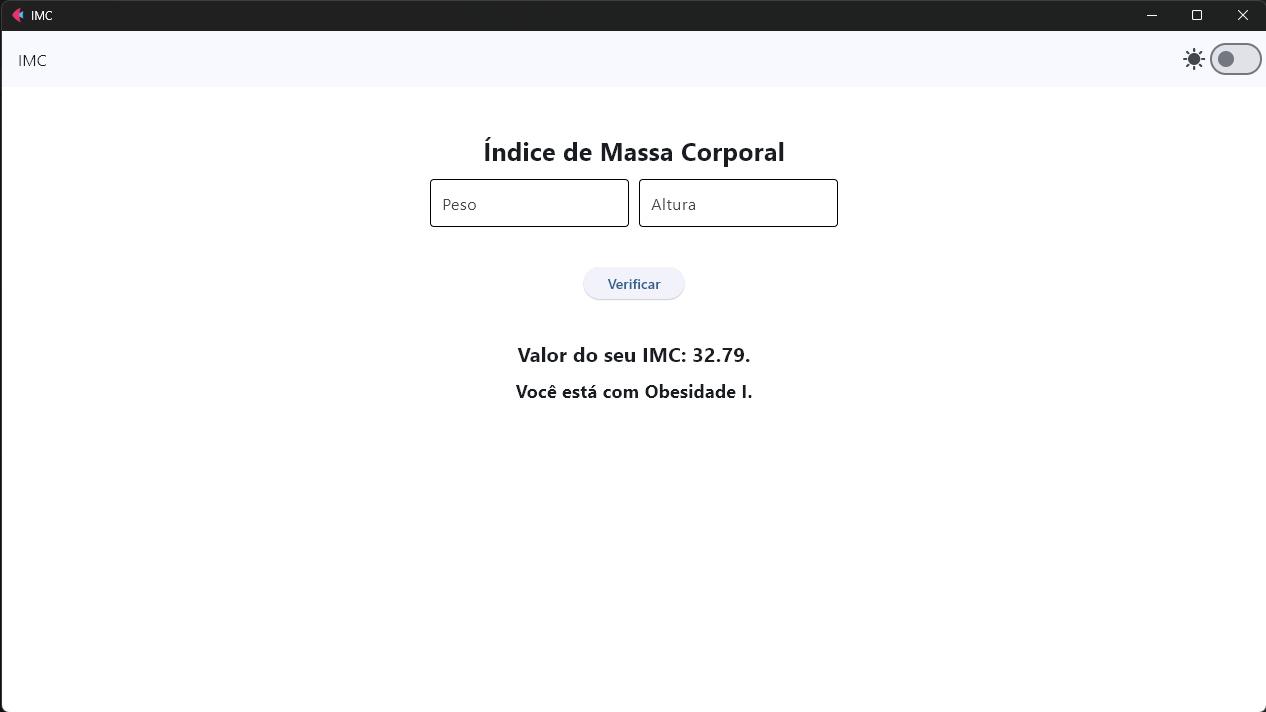

#### Web

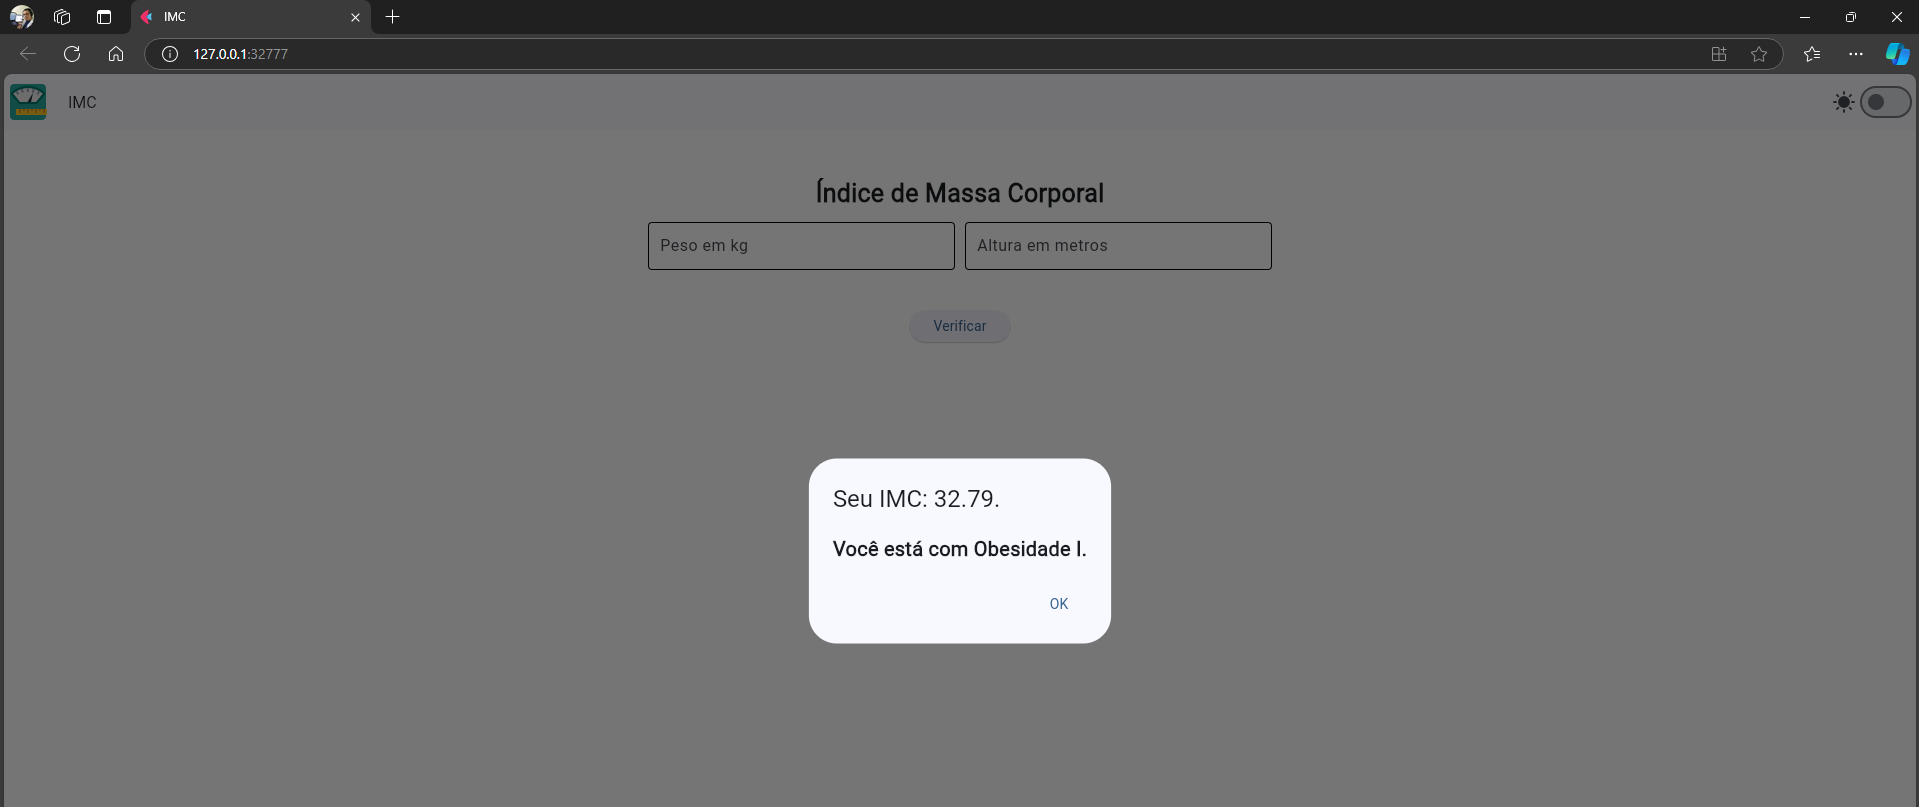

#### Android

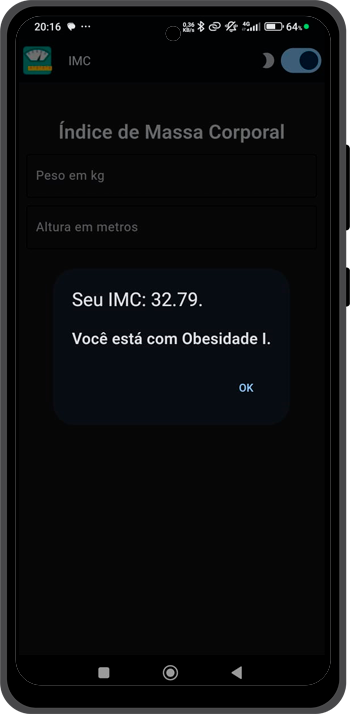